In [15]:
# Import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [16]:
# Create a set of random number for LONGITUDE AND LATITUDE 
lats= np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-90,90,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [17]:
coordinates= list(lat_lngs)

In [18]:
from citipy import citipy

In [19]:
# Create a list of holding the cities
cities=[]
# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the items list 
    if city not in cities:
        cities.append(city)
# print the city count to confirm amount 
len(cities)

637

In [20]:
import requests
requests.__version__

'2.21.0'

In [21]:
# import the requests library 
import requests 

# import the API key 
from config import weather_api_key

# import the datetime module from datetime library
from datetime import datetime

# Starting URL for Weather Map API CALL
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [22]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 73.81,
  'feels_like': 71.65,
  'temp_min': 69.8,
  'temp_max': 77,
  'pressure': 1013,
  'humidity': 68},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 190},
 'rain': {'1h': 1.52},
 'clouds': {'all': 75},
 'dt': 1597873752,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1597830979,
  'sunset': 1597880370},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [23]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [24]:
# 1. Create an empty list to hold the weather data 
city_data = []

# Print the beginning of the logging 
print(f'Beginning Data Retrieval     ')
print("------------------------------")

# create counters 
record_count=1
set_count= 1
# 2. # Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
------------------------------
Processing Record 1 of Set 1 | oistins
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | abadiania
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | sakakah
Processing Record 8 of Set 1 | bonavista
Processing Record 9 of Set 1 | changji
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | los llanos de aridane
Processing Record 13 of Set 1 | suez
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | urfa
City not found. Skipping...
Processing Record 20 of Set 1 | quatre cocos
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | 

Processing Record 34 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 35 of Set 4 | buritizeiro
Processing Record 36 of Set 4 | jumla
Processing Record 37 of Set 4 | cap malheureux
Processing Record 38 of Set 4 | salamiyah
Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | buqayq
City not found. Skipping...
Processing Record 41 of Set 4 | mandera
Processing Record 42 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 4 | nara
Processing Record 44 of Set 4 | vytegra
Processing Record 45 of Set 4 | matay
Processing Record 46 of Set 4 | comodoro rivadavia
Processing Record 47 of Set 4 | sioux lookout
Processing Record 48 of Set 4 | gazanjyk
Processing Record 49 of Set 4 | chota
Processing Record 50 of Set 4 | abu samrah
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | karaul
City not found. Skipping...
Processing Record 3 of Set 5 | svetlyy
Processing Record 4 of Set 5 | raikot
Processing Record 5

Processing Record 23 of Set 8 | esna
Processing Record 24 of Set 8 | saurimo
Processing Record 25 of Set 8 | rochegda
Processing Record 26 of Set 8 | yar-sale
Processing Record 27 of Set 8 | foundiougne
Processing Record 28 of Set 8 | micheweni
Processing Record 29 of Set 8 | wagar
Processing Record 30 of Set 8 | danilovka
Processing Record 31 of Set 8 | arklow
Processing Record 32 of Set 8 | salalah
Processing Record 33 of Set 8 | santa luzia
Processing Record 34 of Set 8 | conde
Processing Record 35 of Set 8 | abrau-dyurso
Processing Record 36 of Set 8 | damghan
Processing Record 37 of Set 8 | sandy bay
Processing Record 38 of Set 8 | ajdabiya
Processing Record 39 of Set 8 | mayor pablo lagerenza
Processing Record 40 of Set 8 | marsh harbour
Processing Record 41 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 42 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 43 of Set 8 | bud
Processing Record 44 of Set 8 | mehamn
Processing Record 45 of Set 8

Processing Record 10 of Set 12 | iracoubo
Processing Record 11 of Set 12 | ouro preto do oeste
Processing Record 12 of Set 12 | mapiripan
Processing Record 13 of Set 12 | nalut
Processing Record 14 of Set 12 | ostuni
Processing Record 15 of Set 12 | the valley
Processing Record 16 of Set 12 | kogon
Processing Record 17 of Set 12 | sikeston
Processing Record 18 of Set 12 | camana
Processing Record 19 of Set 12 | songea
Processing Record 20 of Set 12 | quarteira
Processing Record 21 of Set 12 | biltine
Processing Record 22 of Set 12 | campana
Processing Record 23 of Set 12 | muramvya
Processing Record 24 of Set 12 | fershampenuaz
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | louga
Processing Record 27 of Set 12 | wanlaweyn
Processing Record 28 of Set 12 | itamaraca
Processing Record 29 of Set 12 | jalu
Processing Record 30 of Set 12 | san rafael
Processing Record 31 of Set 12 | sorvag
City not found. Skipping...
Processing Record 32 of Set 12 | chapais
Process

In [25]:
# convert the array of dictionaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Oistins,40,BB,2020-08-19 21:49:51,74,13.07,-59.53,86.00,18.34
1,Nanortalik,36,GL,2020-08-19 21:49:51,82,60.14,-45.24,46.33,14.07
2,Dikson,0,RU,2020-08-19 21:49:51,77,73.51,80.55,48.24,11.70
3,Cape Town,20,ZA,2020-08-19 21:49:51,81,-33.93,18.42,54.00,6.93
4,Abadiania,4,BR,2020-08-19 21:49:51,26,-16.20,-48.71,82.40,2.93


In [26]:
# Reorder Columns 
new_column_order=["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [27]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oistins,BB,2020-08-19 21:49:51,13.07,-59.53,86.00,74,40,18.34
1,Nanortalik,GL,2020-08-19 21:49:51,60.14,-45.24,46.33,82,36,14.07
2,Dikson,RU,2020-08-19 21:49:51,73.51,80.55,48.24,77,0,11.70
3,Cape Town,ZA,2020-08-19 21:49:51,-33.93,18.42,54.00,81,20,6.93
4,Abadiania,BR,2020-08-19 21:49:51,-16.20,-48.71,82.40,26,4,2.93


In [28]:
# Create the output file (CSV)
output_data_file= "weather_data/cities.csv"

In [29]:
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting 
lats=city_data_df['Lat']
max_temp=city_data_df['Max Temp']
humidity= city_data_df['Humidity']
cloudiness= city_data_df['Cloudiness']
wind_speed= city_data_df['Wind Speed']

In [33]:
# Import the time module 
import time 

# get todays date in seconds 
today=time.strftime("%x")
today

'08/19/20'

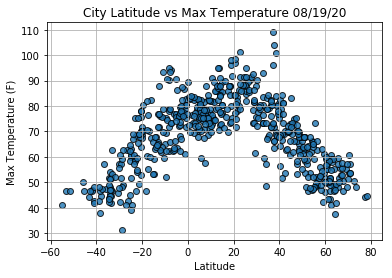

In [37]:
# build the scatter plot for lattitude vs max temperature
plt.scatter(lats,max_temp, edgecolor="black",linewidths=1, 
            marker="o",alpha= .8, label= "Cities")
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()


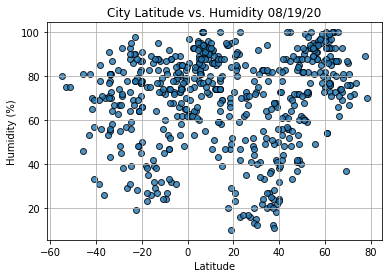

In [39]:
# Build the scatter plots for latitude vs humidity 
plt.scatter(lats,humidity, edgecolor="black", alpha=.8, 
            marker= "o", linewidths= 1, label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show()

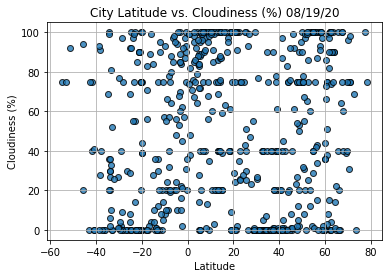

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor= "black", linewidths=1,
           marker="o", alpha=.8, label= "Cities")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("weather_data/Fig3.png")
plt.show()

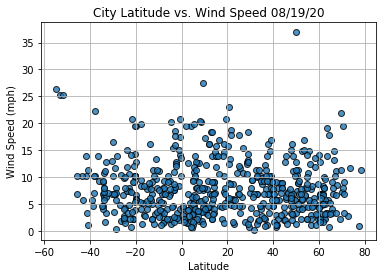

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()